In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

1.12.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

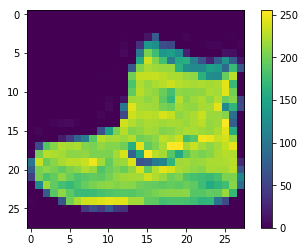

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

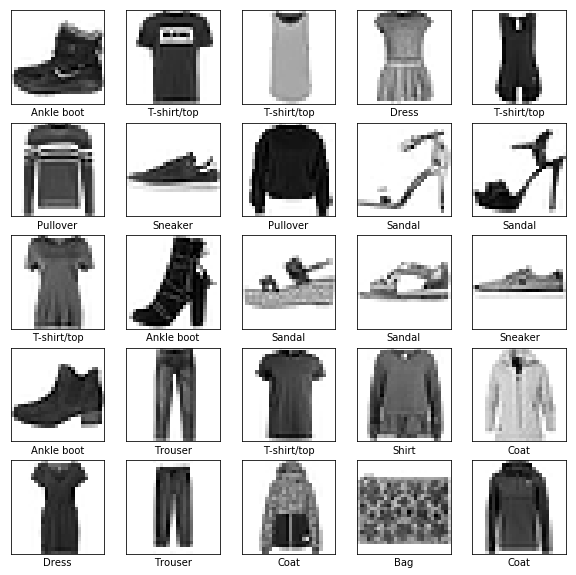

In [13]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 167us/step - loss: 0.4971 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 5s 88us/step - loss: 0.3759 - acc: 0.8643
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3386 - acc: 0.8765
Epoch 4/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.3130 - acc: 0.8852
Epoch 5/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.2967 - acc: 0.8913


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 63us/step
Test accuracy: 0.8701


In [21]:
predicts = model.predict(test_images)

In [22]:
predicts[0]

array([1.9909670e-05, 8.6238640e-07, 3.5532873e-06, 1.0319404e-06,
       7.8699293e-07, 2.7861390e-03, 5.2641415e-05, 7.0592109e-03,
       5.6842022e-05, 9.9001896e-01], dtype=float32)

In [23]:
np.argmax(predicts[0])

9

In [24]:
test_labels[0]

9

In [26]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

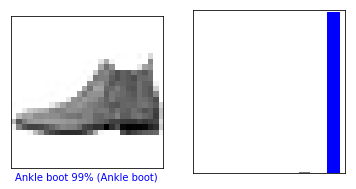

In [27]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

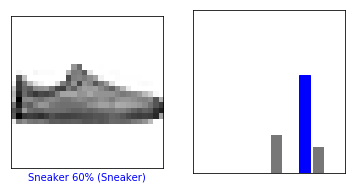

In [29]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

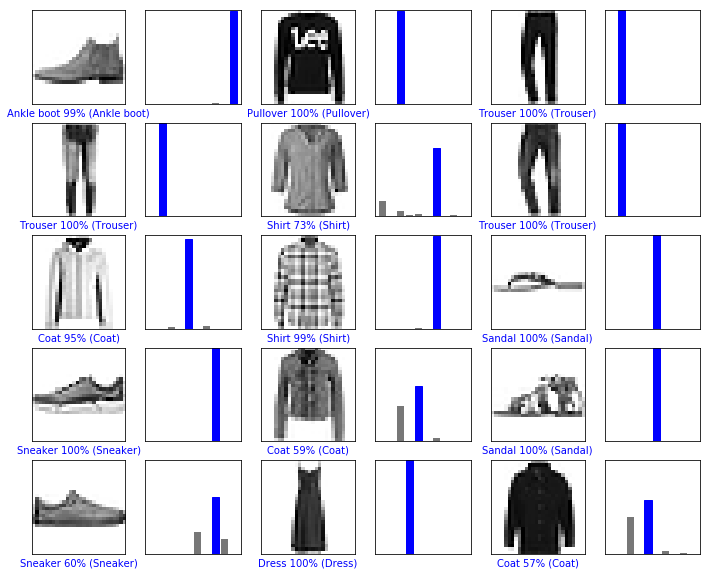

In [30]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)

In [31]:
img = test_images[0]
print(img.shape)

(28, 28)


In [32]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [33]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.9909652e-05 8.6238640e-07 3.5532873e-06 1.0319386e-06 7.8699145e-07
  2.7861348e-03 5.2641368e-05 7.0592007e-03 5.6841913e-05 9.9001896e-01]]


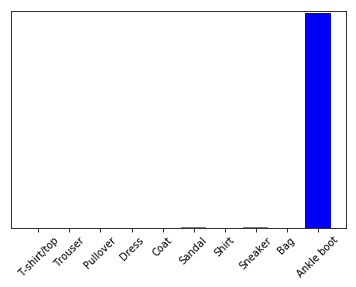

In [34]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [35]:
np.argmax(predictions_single[0])

9